In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import time
from sklearn.metrics import accuracy_score

In [2]:
Lambda=0.0001

In [3]:
class Neural_Network(object):
    def __init__(self,Lambda=0):
        self.ils=1
        self.hls1=7
        self.hls2=7
        self.ols=1
        
        self.W1=np.random.randn(self.ils,self.hls1)
        self.W2=np.random.randn(self.hls1,self.hls2)
        self.W3=np.random.randn(self.hls2,self.ols)
        
        self.Lambda=Lambda
    
    def forward(self,x):
        self.z2=np.dot(x,self.W1)
        self.a2=self.sigmoid(self.z2)
        self.z3=np.dot(self.a2,self.W2)
        self.a3=self.sigmoid(self.z3)
        self.z4=np.dot(self.a3,self.W3)
        a4=self.sigmoid(self.z4)
        
        return a4
    
    def sigmoid(self,z):
        
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def cost(self,x,y):
        self.ypred=self.forward(x)
        J= (sum((0.5)*((self.ypred-y)**2)))/x.shape[0]+ (self.Lambda/2)*(np.sum((self.W1)**2)+np.sum((self.W2)**2)+np.sum((self.W3)**2))
        
        return J
    
    
    def costPrime(self,x,y):
        self.ypred=self.forward(x)
        
        d4=np.multiply((-y+self.ypred),self.sigmoidPrime(self.z4))
        djdw3=np.dot(self.a3.T,d4)/x.shape[0]+self.Lambda*(self.W3)
        d3=np.dot(d4,self.W3.T)*self.sigmoidPrime(self.z3)
        djdw2=np.dot(self.a2.T,d3)/x.shape[0]+self.Lambda*(self.W2)
        d2=np.dot(d3,self.W2.T)*self.sigmoidPrime(self.z2)
        djdw1=np.dot(x.T,d2)/x.shape[0]+self.Lambda*(self.W1)
        return djdw1,djdw2,djdw3
    
    def wrapPara(self):
        param=np.concatenate((self.W1.ravel(),self.W2.ravel(),self.W3.ravel()))
        
        return param
    
    def unwrapPara(self,param):
        
        W1_start=0
        W1_end=self.ils*self.hls1
        self.W1=np.reshape(param[W1_start:W1_end],\
                           (self.ils,self.hls1))
        W2_end=W1_end+self.hls1*self.hls2
        self.W2=np.reshape(param[W1_end:W2_end],\
                           (self.hls1,self.hls2))
        W3_end=W2_end+self.hls2*self.ols
        self.W3=np.reshape(param[W2_end:W3_end],\
                           (self.hls2,self.ols))
        
    def computeGradient(self,x,y):
        djdw1,djdw2,djdw3=self.costPrime(x,y)
        
        return np.concatenate((djdw1.ravel(),djdw2.ravel(),djdw3.ravel()))
        
    
        
        

In [4]:
from math import sin,exp,tanh
from random import randint
def fun(x):
    eps=randint(-10,10)/10
    return 3**((exp(x/1000)*tanh(x/10)))
import csv
csv_columns=["No","X","Y"]
dict_data=[]

n=1000
from random import randint

for i in range(n):
    d={}
    x=randint(2,1000)
    # x = x/1000
    y=fun(x)
    d["No"]=i+1
    d["X"]=x
    d["Y"]=y
    dict_data.append(d)
csv_file="t-1.csv"
from scipy import optimize as opt
try:
    with open(csv_file,"w") as csvfile:
        writer=csv.DictWriter(csvfile,fieldnames=csv_columns)
        writer.writeheader()
        for data in dict_data:
            writer.writerow(data)
except IOError:
    print("Error")
    

ds=pd.read_csv("t-1.csv")
x=ds.iloc[:,[1]].values
y=ds.iloc[:,[2]].values



for i in range(len(y)):
    epsilon = np.random.randint(-10,100)/9
    y[i] = y[i]-epsilon



In [5]:

trainX_n,testX_n,trainY_n,testY_n=train_test_split(x,y,test_size=0.2,random_state=2)


testX = testX_n/np.amax(trainX_n, axis=0)
testY = testY_n/np.amax(trainY_n)
trainX = trainX_n/np.amax(trainX_n, axis=0)
trainY = trainY_n/np.amax(trainY_n, axis=0) 

#Normalize by max of training data:


In [6]:
class trainer(object):
    def __init__(self,N):
        self.N=N
    
    def callbackF(self,param):
        self.N.unwrapPara(param)
        self.J.append(self.N.cost(self.x,self.y))
        self.testJ.append(self.N.cost(self.testX,self.testY))
    
    def costWrapper(self,param,x,y):
        self.N.unwrapPara(param)
        cost=self.N.cost(x,y)
        grad=self.N.computeGradient(x,y)
        
        return cost,grad
    
    def minimizer(self,f,param,tx,ty,d,*cb):
         
        _res = opt.minimize(f,param,jac=True,method='BFGS',args=(tx,ty),options=d,callback=self.callbackF)
        return _res



    def train(self, trainX, trainY, testX, testY):
        
        self.x = trainX
        self.y = trainY
        
        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []
        
        params0 = self.N.wrapPara()

        options = {'maxiter': 90000, 'disp' : True}
        _res = self.minimizer(self.costWrapper, params0,trainX, trainY, d=options)

        self.N.unwrapPara(_res.x)
        self.optimizationResults = _res

In [7]:
nn=Neural_Network()

In [8]:
t=trainer(nn)

In [9]:
t.train(trainX, trainY, testX, testY)

Optimization terminated successfully.
         Current function value: 0.016409
         Iterations: 65
         Function evaluations: 76
         Gradient evaluations: 76


In [10]:
trainX.shape

(800, 1)

In [11]:
ypred=nn.forward(testX)

In [12]:
sqrt(mean_squared_error(testY_n, ypred*np.amax(trainY_n)))

3.4399299866356006

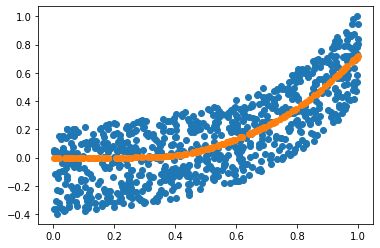

In [13]:
plt.scatter(trainX,trainY)
plt.scatter(testX,ypred)